In [11]:
""" Chapter 6: Gated Recurrent Units (GRUs)
- Assess the drawback of simple RNNs
- Describe the architecture of GRUs
- Perfor setntiment analysis usiing GRUs
- Apply GRUs for text generation 
"""
import numpy as np 
# Write a sigmoid funciton to be used later in the program 
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

n_x = 5 # Dimensionality of input vector 
n_h = 3 # Number of hidden units 
# Define an input at time 't'  having a dimensionality of n_x
x_t = np.random.randn(n_x,1)
#Define W_z, U_z and h_prev (last time step activation)
W_z  = np.random.randn(n_h, n_x) # n_h = 3, n_x = 5
U_z = np.random.randn(n_h, n_h)
h_prev = np.random.randn(n_h, 1)
print("x_t", "\n",x_t)
print("h_prev", "\n",h_prev)
print("W_z", "\n",W_z)
print("U_z", "\n",U_z)

# Calculate expression for update gate
z_t = sigmoid(np.matmul(W_z, x_t) + np.matmul(U_z, h_prev))
print("z_t", "\n",z_t)  

x_t 
 [[-0.24482261]
 [ 1.44573377]
 [ 1.19083632]
 [ 1.13604417]
 [-1.14970342]]
h_prev 
 [[ 0.35284333]
 [-0.68290336]
 [-0.65285356]]
W_z 
 [[ 1.24710147  1.49232748  0.40514834 -0.69156097  1.19811286]
 [-0.4213524   0.83036514 -0.27255521 -0.69752763  1.89803822]
 [-0.49556173 -1.74227672 -1.63352049  2.61142343 -1.46424313]]
U_z 
 [[ 7.42427371e-01 -7.39419529e-01  1.09143513e-01]
 [-7.10384969e-01 -1.37803093e+00  2.73229204e-01]
 [ 1.12207462e+00 -8.60515001e-01 -1.05113727e-03]]
z_t 
 [[0.70416161]
 [0.1848994 ]
 [0.78441619]]


In [12]:
# Define W_r, U_r 
W_r = np.random.randn(n_h, n_x) # n_h = 3, n_x = 5
U_r = np.random.randn(n_h, n_h) # n_h = 3
# calculate  expression for update gate
r_t = sigmoid(np.matmul(W_r, x_t) + np.matmul(U_r, h_prev))
print("W_r", "\n",W_r)
print("U_r", "\n",U_r)
print("r_t", "\n",r_t)
# r_t = r_t > 0.5
# print("r_t", "\n",r_t)

"""note that the values of r_t may not be particularly close to either 0 or 1, but in well-trained network, 
they are expected to be close to 0 or 1 """

W_r 
 [[ 0.92557287  1.67245614  0.3455736  -0.93004148  0.88738223]
 [-0.86721527 -0.61221799  1.71092048 -1.13973708  1.02100643]
 [-0.2633775  -0.18367433 -0.67031078 -0.80449204  0.12186991]]
U_r 
 [[-1.01548105 -0.31631369 -1.30650554]
 [-1.24837425 -2.18014768  0.27743484]
 [-0.85464765  0.30553572 -0.80624652]]
r_t 
 [[0.77499168]
 [0.44107879]
 [0.11535279]]


'note that the values of r_t may not be particularly close to either 0 or 1, but in well-trained network, \nthey are expected to be close to 0 or 1 '

In [13]:
# The candidate activation function 
#Define W,U 
W = np.random.randn(n_h,n_x) # n_h = 3, n_x = 5
U = np.random.randn(n_h, n_h)
# calculate h_candidate
h_candidate =  np.tanh(np.matmul(W, x_t) + np.matmul(U, np.multiply(r_t,h_prev)))
print("W", "\n",W)
print("U", "\n",U)
print("h_candidate", "\n",h_candidate)
# calculate h_new
h_new = np.multiply(z_t, h_prev) + np.multiply((1 - z_t), h_candidate)
print("h_new", "\n",h_new)


W 
 [[-0.10845251 -0.66363675  1.00469768 -0.62228482  0.00629151]
 [ 0.29961781  0.27438183  0.62950836  0.0794455   0.70273625]
 [ 0.26330823 -0.65546923 -0.66209247 -1.04362497  0.3668386 ]]
U 
 [[ 1.72043099 -0.60543995 -1.16487766]
 [-0.39604654  1.12892127  0.51578941]
 [ 0.12294317 -1.03152396 -0.44660494]]
h_candidate 
 [[ 0.28205093]
 [-0.13114332]
 [-0.99534151]]
h_new 
 [[ 0.33190022]
 [-0.23316342]
 [-0.72668842]]


In [23]:
# Exerceise 25: Calculate the Model validation accuracy and Loss for Sentiment Classification 
from keras.datasets import imdb
#1. define the max number of topmost frequent words when generating the sequence for training(10000), max sequence len(500)
max_features = 10000
max_len = 500 

#2. Load the data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print("NUmber of train sequences:", len(X_train),"\n","train data shape:", X_train.shape)
print("NUmber of train sequences:", len(X_test),"\n","train data shape:", X_test.shape)
#3. theere may be sequences with lengh < 5000, so pad them to exactly 500
from keras. preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
print("-------Done Paddding-------") #4. Check
print("NUmber of train sequences:", len(X_train),"\n","train data shape:", X_train.shape)
print("NUmber of train sequences:", len(X_test),"\n","train data shape:", X_test.shape)

#5. Build RNN with GRU 
from keras.models import Sequential # Sequence model of Keras
from keras.layers import Embedding  # Embedding layer turns vectors to fixed size for next layers
from keras.layers import Dense      # Dense layer gives a distribution over target varialbles (0 or 1)
from keras.layers import GRU 

#6-7. Initialize RNN with GRU unit, 32 is a hyperparameter, represents the dimensionality of activation func
RNN_GRU = Sequential()
RNN_GRU.add(Embedding(max_features,32)) # 32 as output for the next GRU layer.
RNN_GRU.add(GRU(32)) #  GRU layer will expect 32 inputs from embedding layer
RNN_GRU.add(Dense(1, activation='sigmoid')) # Dense will only give 1 value as the probability of renvew

from keras import optimizers
rms = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
#8. Compile the model with binary cross-entropy and rmsprop optimizer 
RNN_GRU.compile(optimizer= rms, loss='binary_crossentropy', metrics=['accuracy'])
RNN_GRU.summary()

#9. Track accuracy as metric, put 20% of train data as validation data, pass 128 sequences/batch
History = RNN_GRU.fit(X_train,y_train, epochs=25, batch_size=128, validation_split=0.2)
RNN_GRU.save("RNN_GRU.h5")
print("Saved model RNN_GRU to disk")


NUmber of train sequences: 25000 
 train data shape: (25000,)
NUmber of train sequences: 25000 
 train data shape: (25000,)
-------Done Paddding-------
NUmber of train sequences: 25000 
 train data shape: (25000, 500)
NUmber of train sequences: 25000 
 train data shape: (25000, 500)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [=====================

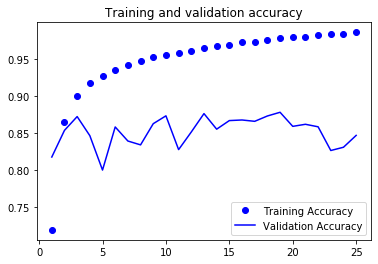

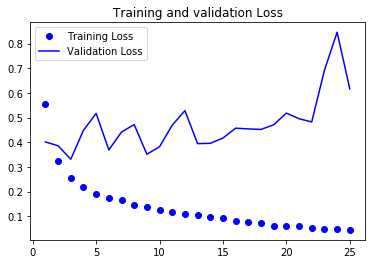

In [26]:
#10. Check the training progress
import matplotlib.pyplot as plt
def plot_results(history):
    acc = History.history['accuracy']
    val_acc = History.history['val_accuracy']
    loss = History.history['loss']
    val_loss = History.history['val_loss']
    epochs = range( 1, len(acc) +1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend() 
    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
    plt.title('Training and validation Loss')
    plt.legend()
    plt.show()


#11. Call our function on the history variable 
plot_results(History)
# Note: LOSS is lowest and Accuracy is highest. 


In [27]:
scores = RNN_GRU.evaluate(X_test,y_test, verbose= 0)
print(scores)

[0.6509586832809449, 0.8339200019836426]


In [24]:
# Activity 7: Let's use Simple RNN for Sentiment Classification 
from keras.datasets import imdb
#1. define the max number of topmost frequent words when generating the sequence for training(10000), max sequence len(500)
max_features = 10000
max_len = 500 

#2. Load the data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print("NUmber of train sequences:", len(X_train),"\n","train data shape:", X_train.shape)
print("NUmber of train sequences:", len(X_test),"\n","train data shape:", X_test.shape)

#3. there may be sequences with lengh < 5000, so pad them to exactly 500
from keras. preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
print("-------Done Paddding-------") #4. Check
print("NUmber of train sequences:", len(X_train),"\n","train data shape:", X_train.shape)
print("NUmber of train sequences:", len(X_test),"\n","train data shape:", X_test.shape)

#5. Build Simple RNN
from keras.models import Sequential # Sequence model of Keras
from keras.layers import Embedding  # Embedding layer turns vectors to fixed size for next layers
from keras.layers import Dense      # Dense layer gives a distribution over target varialbles (0 or 1)
from keras.layers import SimpleRNN

#6-7. Initialize Simple RNN with 32 hidden unit, 32 is a hyperparameter
Simple_RNN = Sequential()
Simple_RNN.add(Embedding(max_features,32)) # 32 as output for the next  layer.
Simple_RNN.add(SimpleRNN(32)) #  GRU layer will expect 32 inputs from embedding layer
Simple_RNN.add(Dense(1, activation='sigmoid')) # Dense will only give 1 value as the probability of renvew

from keras import optimizers
rms = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
#8. Compile the model with binary cross-entropy and rmsprop optimizer 
Simple_RNN.compile(optimizer= rms, loss='binary_crossentropy', metrics=['accuracy'])
Simple_RNN.summary()

#9. Track accuracy as metric, put 20% of train data as validation data, pass 128 sequences/batch
RNN_History = Simple_RNN.fit(X_train,y_train, epochs=25, batch_size=128, validation_split=0.2)
Simple_RNN.save("Simple_RNN.h5")
print("Saved model Simple_RNN to disk")


NUmber of train sequences: 25000 
 train data shape: (25000,)
NUmber of train sequences: 25000 
 train data shape: (25000,)
-------Done Paddding-------
NUmber of train sequences: 25000 
 train data shape: (25000, 500)
NUmber of train sequences: 25000 
 train data shape: (25000, 500)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [=====================

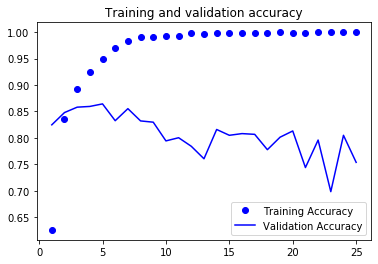

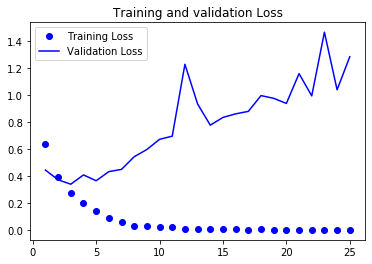

In [25]:
# Activity 7: Simple RNN for Sentiment Classification 
#10. Check the training progress
import matplotlib.pyplot as plt
def plot_results(history):
    acc = RNN_History.history['accuracy']
    val_acc = RNN_History.history['val_accuracy']
    loss = RNN_History.history['loss']
    val_loss = RNN_History.history['val_loss']
    epochs = range( 1, len(acc) +1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend() 
    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
    plt.title('Training and validation Loss')
    plt.legend()
    plt.show()


#11. Call our function on the history variable 
plot_results(RNN_History)
# NOTE LOSS is lowest and Accuracy is highest. 



In [28]:
RNNscores = Simple_RNN.evaluate(X_test,y_test, verbose= 0)
print(RNNscores)  

[1.2968134094047545, 0.7487999796867371]


In [73]:
# Exercise 26: Generating Text using GRUs
#1. import libs
import io, sys, random, string
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.optimizers import RMSprop

#2. Define a function to read from the file containing Shakespearan, and print out 200 characters 
def load_text(file_name):
    with open(file_name, 'r') as f:
        text = f.read()
        return text

file_poem = 'shakespeare_poems.txt' # Path of the file 
text = load_text(file_poem)
print(text[:200], "\n")

#3. Data preparation steps. 
chars = sorted(list(set(text)))
print("Number of distinct characters: ", len(chars))
char_indices = dict((c,i) for i,c in enumerate(chars))
print(char_indices, "\n")
indices_char = dict((i,c) for i,c in enumerate(chars))
print(indices_char)



THE SONNETS

by William Shakespeare

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his mem 

Number of distinct characters:  61
{'\n': 0, ' ': 1, '!': 2, "'": 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, ':': 9, ';': 10, '?': 11, 'A': 12, 'B': 13, 'C': 14, 'D': 15, 'E': 16, 'F': 17, 'G': 18, 'H': 19, 'I': 20, 'J': 21, 'K': 22, 'L': 23, 'M': 24, 'N': 25, 'O': 26, 'P': 27, 'R': 28, 'S': 29, 'T': 30, 'U': 31, 'V': 32, 'W': 33, 'Y': 34, 'a': 35, 'b': 36, 'c': 37, 'd': 38, 'e': 39, 'f': 40, 'g': 41, 'h': 42, 'i': 43, 'j': 44, 'k': 45, 'l': 46, 'm': 47, 'n': 48, 'o': 49, 'p': 50, 'q': 51, 'r': 52, 's': 53, 't': 54, 'u': 55, 'v': 56, 'w': 57, 'x': 58, 'y': 59, 'z': 60} 

{0: '\n', 1: ' ', 2: '!', 3: "'", 4: '(', 5: ')', 6: ',', 7: '-', 8: '.', 9: ':', 10: ';', 11: '?', 12: 'A', 13: 'B', 14: 'C', 15: 'D', 16: 'E', 17: 'F', 18: 'G', 19: 'H', 20: 'I', 21: 'J', 22: 'K', 23: 'L', 24: 'M', 25

In [74]:
#4. Generate sequences for training data, fixed 40 characters/1 sequence for the model 
Max_len_chars = 40
Step = 3 # Increment the sequence with 3 
Sentences = []
Next_chars = []
for i in range(0, len(text) - Max_len_chars, Step):
    Sentences.append(text[i:i + Max_len_chars])
    Next_chars.append(text[i + Max_len_chars])
# print("nb sequences:", len(Sentences))
# Sentences

# Obtain a training matrix fo train on, and the corresponding character output for the same
# *** Vectorization ***
X = np.zeros((len(Sentences), Max_len_chars, len(chars)), dtype=np.bool)
y = np.zeros((len(Sentences), len(chars)), dtype= np.bool)

for i, Sentences in enumerate(Sentences):
    for t, char in enumerate(Sentences):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[Next_chars[i]]] = 1


# Define our model
GRU_Model = Sequential()
GRU_Model.add(GRU(128, input_shape =(Max_len_chars, len(chars)))) # 128 hidden parameters
GRU_Model.add(Dense(len(chars),activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
GRU_Model.compile(loss='categorical_crossentropy', optimizer=optimizer)
GRU_Model.summary()

GRU_Model.fit(X,y, batch_size= 128, epochs=20)
GRU_Model.save("Poem_gen_GRU_Model_128_20.h5")
  

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 128)               72960     
_________________________________________________________________
dense_9 (Dense)              (None, 61)                7869      
Total params: 80,829
Trainable params: 80,829
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
31327/31327 [==============================] - 16s 508us/step - loss: 2.2728
Epoch 2/20
31327/31327 [==============================] - 17s 531us/step - loss: 1.8928
Epoch 3/20
31327/31327 [==============================] - 17s 534us/step - loss: 1.7501
Epoch 4/20
31327/31327 [==============================] - 16s 503us/step - loss: 1.6447
Epoch 5/20
31327/31327 [==============================] - 15s 479us/step - loss: 1.5654
Epoch 6/20
31327/31327 [==============================] - 15s 474us/step

In [75]:
from keras.models import load_model
model_loaded = load_model('Poem_gen_GRU_Model_128_20.h5')
#5 Sampling function selects a candidate character given a probablility distribution over number of characters
def sample(preds, temperature =1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)/temperature 
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1,preds, 1)
    return np.argmax(probas)

#6. Sampling using a multinomial distribution, the temperature para helps o add bias to the probability 
def generate_poem(model, num_chars_to_generate=400):
    start_index = random.randint(0, len(text) - Max_len_chars - 1)
    generated = ''
    sentence = text[start_index: start_index + Max_len_chars]
    generated += sentence
    # print("Seed sentence: {}".format(generated))
    for i in range(num_chars_to_generate):
        x_pred = np.zeros((1, Max_len_chars, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indicate[char]] = 1.
            
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, 1)
        next_char = indicate_char[next_index]
 
        generated += next_char
        sentence = sentence[1:] + next_char
    return generated

#7. Call the model 
print(generate_poem(model_loaded,100))


thee doth live.
Then thank him not for thy love's greser,
Of force carmeath's frach thy stays to ad:
But mines live that charge, be duty,
ry


In [76]:
print(generate_poem(model_loaded,200))


solemn and so rare,
Since seldom coming ners raise decayess,
That havike and crime have skill ower than,
Sain thy muse, not ciles to with beingert.

r
Or thy beautho sun unsece.
cairtall that ssunte?
Ih am I sweary says and part of must pi,
